# Non-Parametric tests

Non-parametric statistics are used in situations where the assumptions for parametric statistics cannot be met. The idea is to use a test that relaxes these strict requirements in the real world of messy data. Using a non-parametric test usually requires you to make some tradeoff, e.g., lower statistical power, loss of precision, limited inference scope, etc., compared to using the parametric counterpart. You make this compromise in order to get a meaningful result when the data does not allow you to use the parametric counterpart.

## Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank test is the non-parametric counterpart to the Paired t-test. These tests are used when checking for a difference between two paired values, e.g., was there a significant change in a given value after a course of a specific medical treatment?

### Crop fertalizer

Consider the below example of checking to see if crop fertalizer affects crop yields.

In [9]:
import numpy as np
from scipy.stats import wilcoxon, ttest_rel, shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(123)

# Simulate 'before' yields (normal)
before = np.random.normal(loc=50, scale=5, size=30)

# Simulate 'after' yields with right-skewed differences (exponential) and a couple of big outliers
improvement = np.random.exponential(scale=2, size=30)
improvement[[5, 21]] += 12  # introduce outliers
after = before + improvement

# Differences
diffs = after - before

# Shapiro-Wilk test for normality of differences
shapiro_stat, shapiro_p = shapiro(diffs)

# Paired t-test
t_stat, t_p = ttest_rel(after, before)

# Wilcoxon Signed-Rank test
w_stat, w_p = wilcoxon(diffs)

# Print results
print("=== Paired Yield Data with Skew and Outliers ===")
print(f"Shapiro-Wilk test (normality of differences): p = {shapiro_p:.4f}")
print(f"Paired t-test: t = {t_stat:.3f}, p = {t_p:.4f}")
print(f"Wilcoxon Signed-Rank test: W = {w_stat}, p = {w_p:.4f}")

# Plot
df = pd.DataFrame({
    'Before': before,
    'After': after,
    'Plot': range(1, 31)
})
df_melted = df.melt(id_vars="Plot", value_vars=["Before", "After"],
                    var_name="Condition", value_name="Yield")

=== Paired Yield Data with Skew and Outliers ===
Shapiro-Wilk test (normality of differences): p = 0.0000
Paired t-test: t = 4.102, p = 0.0003
Wilcoxon Signed-Rank test: W = 0.0, p = 0.0000


In this data, the Shapiro-Wilk test indicates that the differences are not normally distributed (recall that a positive results with Shapiro-Wilk means data **is not** normal), so the paired t-test will give inflated values and its positive result cannot be trusted. Using Wilcoxon Signed-Rank has less statistical power which means it needs a larger effect size to get a positive result. In this case, it allowed you to detect the positive result despite non-normal data (see the plot below).

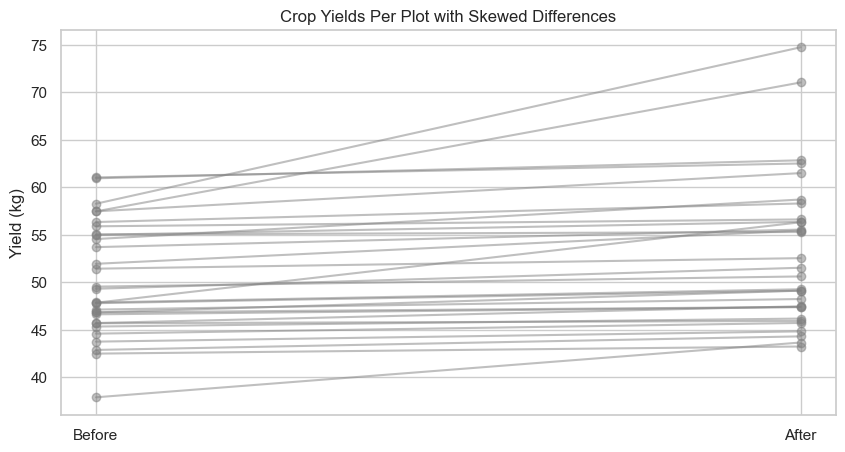

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
for i in range(30):
    plt.plot(["Before", "After"], [before[i], after[i]], marker='o', color='gray', alpha=0.5)
plt.title("Crop Yields Per Plot with Skewed Differences")
plt.ylabel("Yield (kg)")
plt.xticks(["Before", "After"])
plt.show()


## Mann-Whitney U test

The Mann-Whitney U test is the non-parametric version of the Independent t-test. They are used to detect if there is a significant difference between two independent groups. The below example tests if two different soil types affect crop yield.

In [11]:
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seed
np.random.seed(456)

# Simulated Data
soil_a = np.random.normal(loc=50, scale=5, size=30)
soil_b = np.random.exponential(scale=8, size=30) + 45  # skewed

# Shapiro-Wilk Normality Tests
shapiro_a = shapiro(soil_a)
shapiro_b = shapiro(soil_b)

# t-test and Mann-Whitney U test
t_stat, t_p = ttest_ind(soil_a, soil_b)
u_stat, u_p = mannwhitneyu(soil_a, soil_b, alternative='two-sided')

# Output test results
print("=== Statistical Tests ===")
print(f"Shapiro-Wilk Soil A: p = {shapiro_a.pvalue:.4f} (normal: {'yes' if shapiro_a.pvalue > 0.05 else 'no'})")
print(f"Shapiro-Wilk Soil B: p = {shapiro_b.pvalue:.4f} (normal: {'yes' if shapiro_b.pvalue > 0.05 else 'no'})")
print(f"t-test: t = {t_stat:.3f}, p = {t_p:.4f}")
print(f"Mann-Whitney U: U = {u_stat}, p = {u_p:.4f}")

=== Statistical Tests ===
Shapiro-Wilk Soil A: p = 0.7866 (normal: yes)
Shapiro-Wilk Soil B: p = 0.0001 (normal: no)
t-test: t = -0.939, p = 0.3518
Mann-Whitney U: U = 450.0, p = 1.0000


The Independent t-test requires both samples to be normal (giving it higher statistical power and the ability to detect smaller changes), so we cannot trust its result in this case. We see that the Mann-Whitney *p*-value is greater than 0.05, so the test fails. Recall that the null hypothesis of the Mann-Whitney is that the two distibutions being compared are identical. In this case, a fail is what we want; it implies there is a difference in the distributions, i.e., a difference in crop yields. We are able to detect this despite Soil B not being normally distributed.

C:\Users\Josiah\AppData\Local\Temp\ipykernel_8720\3625741539.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil Type', y='Yield', data=df, ax=axs[0, 2], palette="pastel")


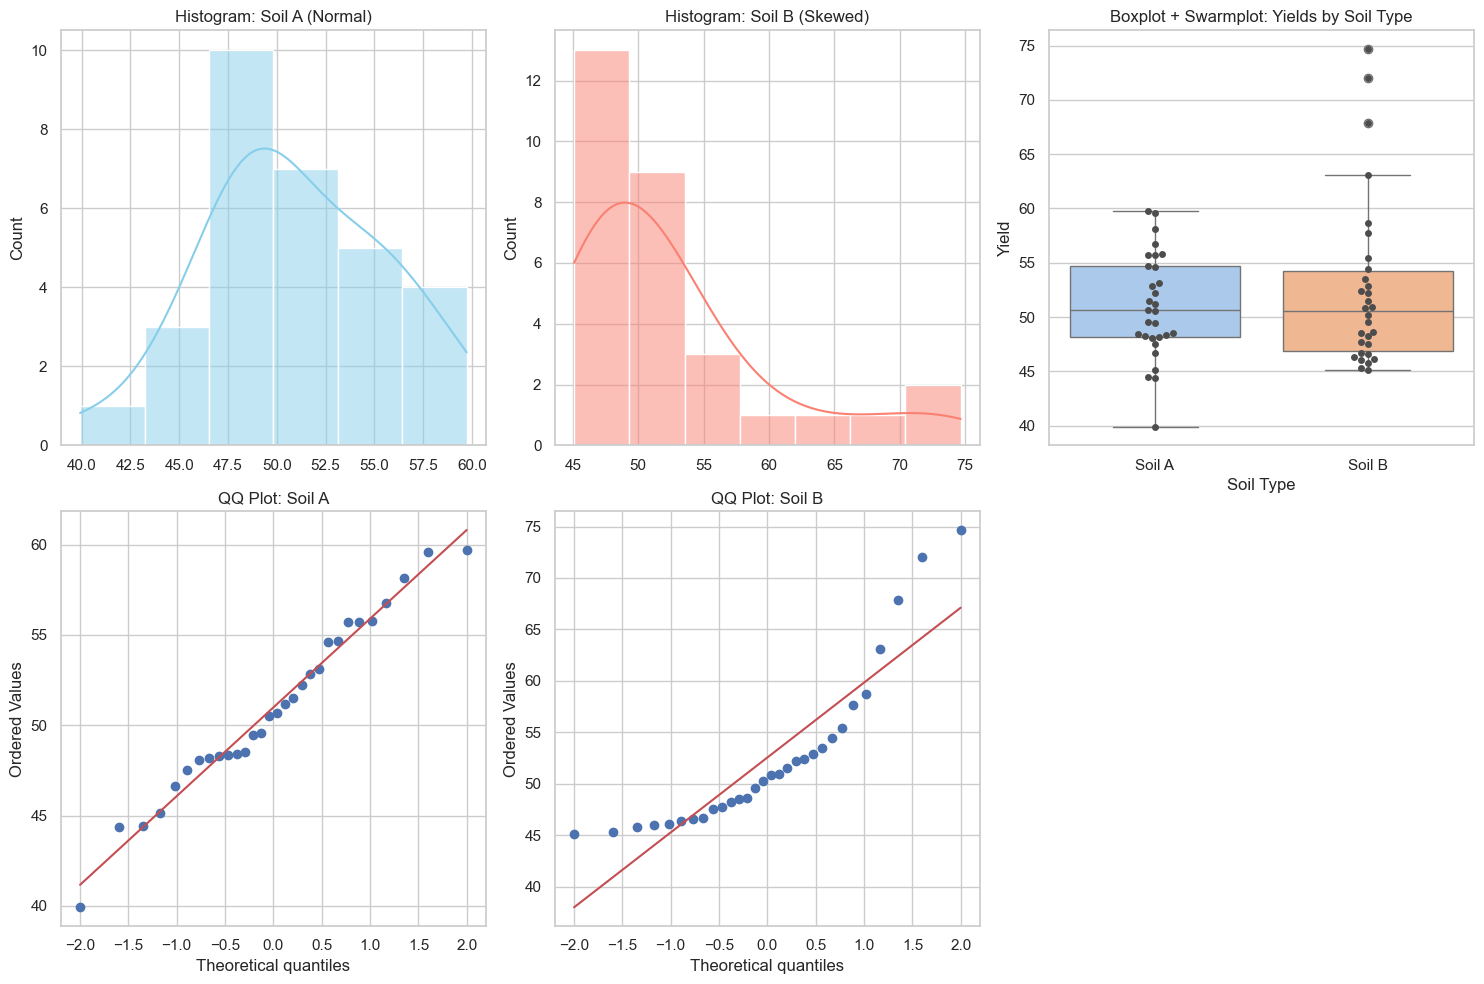

In [12]:

# Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Histograms
sns.histplot(soil_a, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Histogram: Soil A (Normal)")

sns.histplot(soil_b, kde=True, ax=axs[0, 1], color='salmon')
axs[0, 1].set_title("Histogram: Soil B (Skewed)")

# QQ plots
probplot(soil_a, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("QQ Plot: Soil A")

probplot(soil_b, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("QQ Plot: Soil B")

# Boxplot with swarmplot
df = pd.DataFrame({
    'Yield': np.concatenate([soil_a, soil_b]),
    'Soil Type': ['Soil A'] * len(soil_a) + ['Soil B'] * len(soil_b)
})
sns.boxplot(x='Soil Type', y='Yield', data=df, ax=axs[0, 2], palette="pastel")
sns.swarmplot(x='Soil Type', y='Yield', data=df, ax=axs[0, 2], color=".3", size=5)
axs[0, 2].set_title("Boxplot + Swarmplot: Yields by Soil Type")

# Remove unused plot
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()


## Kruskal-Wallis Test

The Kruskal-Wallis Test extends the Mann-Whitney U Test just as the One-Way ANOVA (its parametric counterpart) extends the Independent t-test. These tests allow you to detect a difference across three or more groups.

Consider the example below comparing household income between urban, suburban, and rural regions.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, probplot

# Seed for reproducibility
np.random.seed(2025)

# Simulate income data (in $1000s)
urban = np.random.normal(loc=75, scale=10, size=40)
suburban = np.random.exponential(scale=20, size=40) + 60  # right-skewed
rural = np.random.normal(loc=50, scale=15, size=40)

# Combine into a DataFrame
df = pd.DataFrame({
    'Income': np.concatenate([urban, suburban, rural]),
    'Region': ['Urban']*40 + ['Suburban']*40 + ['Rural']*40
})

# Shapiro-Wilk normality tests
print("\n=== Shapiro-Wilk Normality Tests ===")
for region, data in df.groupby('Region'):
    stat, p = shapiro(data['Income'])
    print(f"{region}: p = {p:.4f} {'(normal)' if p > 0.05 else '(not normal)'}")

# One-way ANOVA
anova_stat, anova_p = f_oneway(urban, suburban, rural)

# Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(urban, suburban, rural)

# Results
print("\n=== Test Results ===")
print(f"ANOVA: F = {anova_stat:.3f}, p = {anova_p:.4f}")
print(f"Kruskal-Wallis: H = {kruskal_stat:.3f}, p = {kruskal_p:.4f}")


=== Shapiro-Wilk Normality Tests ===
Rural: p = 0.6648 (normal)
Suburban: p = 0.0000 (not normal)
Urban: p = 0.6914 (normal)

=== Test Results ===
ANOVA: F = 51.156, p = 0.0000
Kruskal-Wallis: H = 63.009, p = 0.0000


Since the Suburban group is not normally distributed, we cannot trust the positive results from the ANOVA test. Kruskal-Wallis, on the other hand, informs us that at least one group has a significantly different distribution despite this limitation. Again, to obtain these useful results, we lose sensitivity to differences between groups.

C:\Users\Josiah\AppData\Local\Temp\ipykernel_8720\1025451914.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Income', data=df, palette='pastel')


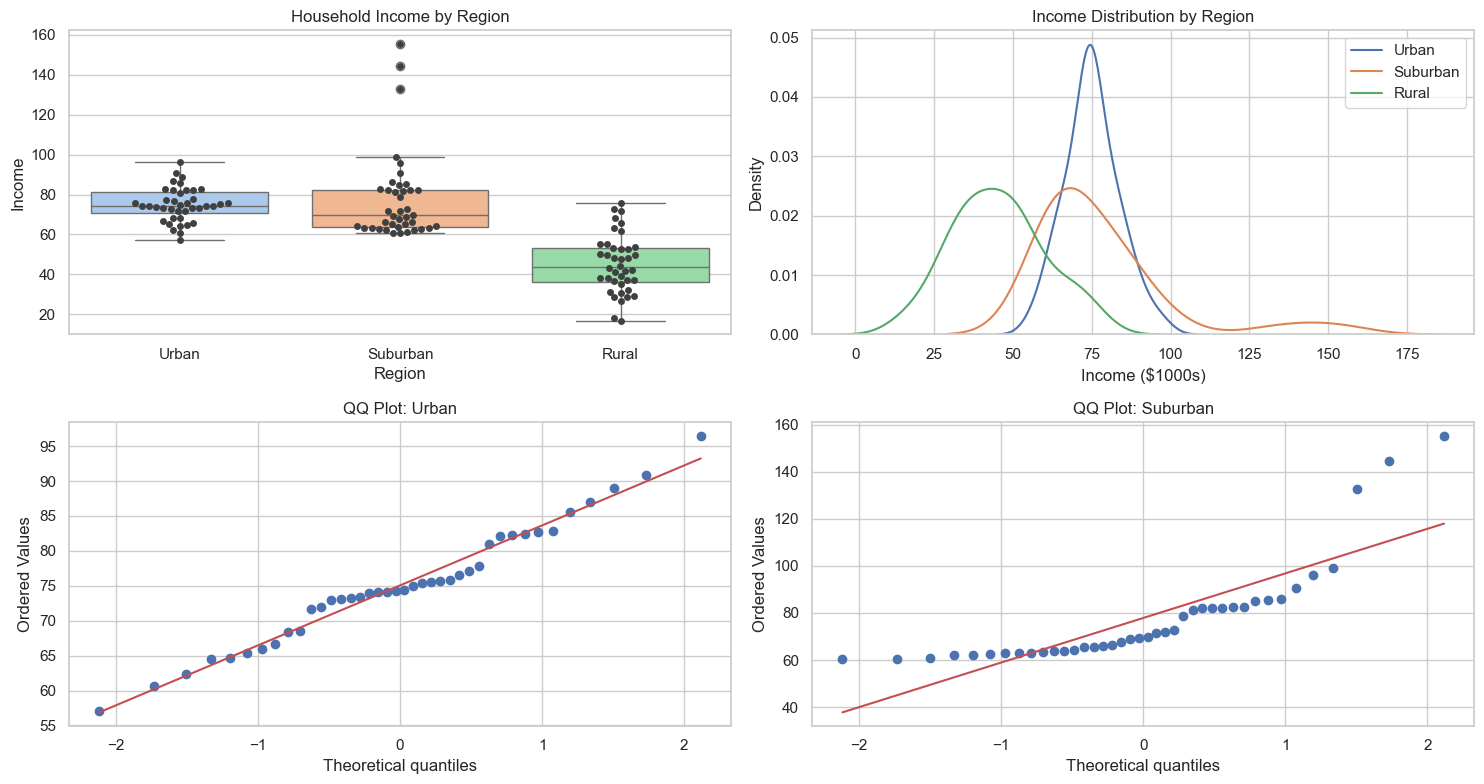

In [14]:

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Boxplot + swarmplot
plt.subplot(2, 2, 1)
sns.boxplot(x='Region', y='Income', data=df, palette='pastel')
sns.swarmplot(x='Region', y='Income', data=df, color=".25", size=5)
plt.title("Household Income by Region")

# Histograms
plt.subplot(2, 2, 2)
for region in ['Urban', 'Suburban', 'Rural']:
    sns.kdeplot(df[df['Region'] == region]['Income'], label=region)
plt.title("Income Distribution by Region")
plt.xlabel("Income ($1000s)")
plt.legend()

# QQ plots
plt.subplot(2, 2, 3)
probplot(urban, dist="norm", plot=plt)
plt.title("QQ Plot: Urban")

plt.subplot(2, 2, 4)
probplot(suburban, dist="norm", plot=plt)
plt.title("QQ Plot: Suburban")

plt.tight_layout()
plt.show()


## Bootstrapping Test

Bootstrapping allows you to sample with replacement and create a "null" distribution when your original dataset doesn't have enough information or you cannot assume normality. You can then run statistical tests using your simulated dataset. When bootstrapping, you run the t-test on your original data even though you cannot depend on meeting all the assumptions. You then run the t-test on your bootstrapped data. If it confirms the results, you can depend on your results not being affected by the failed assumptions.

Suppose you want to detect if urban and rural households have different income levels using a t-test but the rural data is skewed:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set random seed
np.random.seed(42)

# Simulate data (monthly household expenditures in $1000s)
urban = np.random.normal(loc=4.5, scale=0.5, size=30)      # roughly normal
rural = np.random.exponential(scale=1.0, size=30) + 3.0    # skewed, lower mean

# Parametric t-test
t_stat, t_p = ttest_ind(urban, rural, equal_var=False)

print(f"t-test: t = {t_stat:.3f}, p = {t_p:.4f}")

# Bootstrap setup
n_iterations = 10000
boot_diffs = []

for _ in range(n_iterations):
    urban_sample = np.random.choice(urban, size=len(urban), replace=True)
    rural_sample = np.random.choice(rural, size=len(rural), replace=True)
    diff = np.mean(urban_sample) - np.mean(rural_sample)
    boot_diffs.append(diff)

# Observed difference
obs_diff = np.mean(urban) - np.mean(rural)

# Two-tailed p-value
boot_diffs = np.array(boot_diffs)
p_boot = np.mean(np.abs(boot_diffs) >= abs(obs_diff))

print(f"Bootstrap test: observed mean diff = {obs_diff:.3f}, p = {p_boot:.4f}")

t-test: t = 2.393, p = 0.0213
Bootstrap test: observed mean diff = 0.452, p = 0.5166


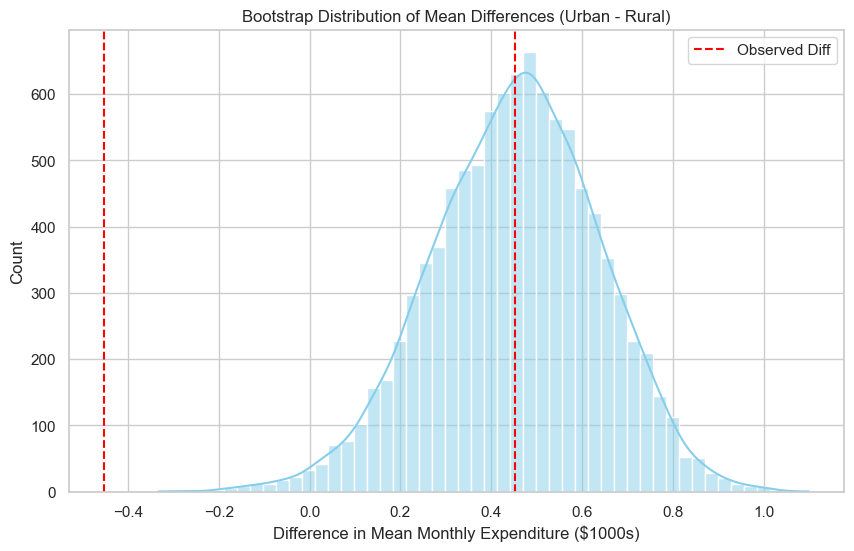

In [16]:
# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(boot_diffs, bins=50, kde=True, color='skyblue')
plt.axvline(obs_diff, color='red', linestyle='--', label='Observed Diff')
plt.axvline(-obs_diff, color='red', linestyle='--')
plt.title("Bootstrap Distribution of Mean Differences (Urban - Rural)")
plt.xlabel("Difference in Mean Monthly Expenditure ($1000s)")
plt.legend()
plt.show()
